In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection, tree
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [26]:
df = pd.read_csv('diabetes.csv')

In [27]:
df

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,2,5,6,7,11
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,1,11,2,4,6
253677,0,0,0,28,0,0,0,1,1,0,...,0,1,0,0,0,1,2,5,2,5
253678,0,1,0,23,0,0,0,0,1,1,...,0,3,0,0,0,2,7,5,1,6


In [28]:
bmi_mean = df["BMI"].mean()
bmi_std = df["BMI"].std()
df["BMI"] = (df["BMI"] - bmi_mean)/bmi_std

gh_mean = df["GeneralHealth"].mean()
gh_std = df["GeneralHealth"].std()
df["GeneralHealth"] = (df["GeneralHealth"] - gh_mean)/gh_std

mh_mean = df["MentalHealth"].mean()
mh_std = df["MentalHealth"].std()
df["MentalHealth"] = (df["MentalHealth"] - mh_mean)/mh_std

ph_mean = df["PhysicalHealth"].mean()
ph_std = df["PhysicalHealth"].std()
df["PhysicalHealth"] = (df["PhysicalHealth"] - ph_mean)/ph_std

ab_mean = df["AgeBracket"].mean()
ab_std = df["AgeBracket"].std()
df["AgeBracket"] = (df["AgeBracket"] - ab_mean)/ab_std

ib_mean = df["IncomeBracket"].mean()
ib_std = df["IncomeBracket"].std()
df["IncomeBracket"] = (df["IncomeBracket"] - ib_mean)/ib_std

In [29]:
df["BiologicalSex"] = np.where(df["BiologicalSex"] == 1, 0, 1)

In [30]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[["EducationBracket"]]).toarray())
encoder_df.columns = ["Kindergarten", "Elementary", "HighSchool", "GED", "College", "Graduate"]
df.drop("EducationBracket", axis=1, inplace=True)
df = df.join(encoder_df)

encoder_df = pd.DataFrame(encoder.fit_transform(df[["Zodiac"]]).toarray())
encoder_df.columns = ["Aries", "Taurus", "Gemini", "Cancer", "Leo", "Virgo", "Libra", "Scorpio", "Sagittarius", "Capricorn", "Aquarius", "Pisces"]
df.drop("Zodiac", axis=1, inplace=True)
df = df.join(encoder_df)

In [31]:
df

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,Gemini,Cancer,Leo,Virgo,Libra,Scorpio,Sagittarius,Capricorn,Aquarius,Pisces
0,0,1,1,1.757932,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,-0.511805,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,1,-0.057858,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,-0.209173,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,1,-0.663121,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,2.514511,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
253676,1,1,1,-1.571016,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
253677,0,0,0,-0.057858,0,0,0,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253678,0,1,0,-0.814437,0,0,0,0,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Question 1

In [32]:
X_df = df.drop("Diabetes", axis=1)
y_df = df["Diabetes"]

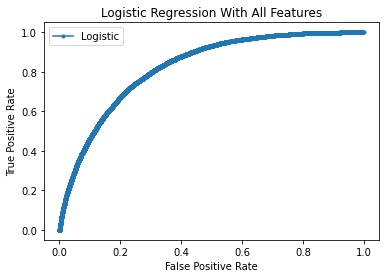

Logistic Regression Accuracy = 72.857%
Logistic Regression AUC = 0.82424


In [33]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)
log_reg = LogisticRegression(solver = 'liblinear', class_weight = 'balanced').fit(X_train, y_train)
pred = log_reg.predict(X_test)
log_acc = metrics.accuracy_score(y_test, pred)
log_probs = log_reg.predict_proba(X_test)
log_probs = log_probs[:, 1]
auc = metrics.roc_auc_score(y_test, log_probs)
fpr, tpr, _ = metrics.roc_curve(y_test, log_probs)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression With All Features')
plt.legend()
plt.show()
print('Logistic Regression Accuracy = {:0.3f}%'.format(100*log_acc))
print('Logistic Regression AUC = %.5f' % (auc))

In [34]:
features = df.columns.drop('Diabetes')
for i in features:
    X_df = df.drop(['Diabetes', i], axis=1)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)
    log_reg = LogisticRegression(solver='liblinear', class_weight = 'balanced').fit(X_train, y_train)
    log_probs = log_reg.predict_proba(X_test)
    log_probs = log_probs[:, 1]
    log_auc = metrics.roc_auc_score(y_test, log_probs)
    print('Logistic Regression AUC = %.5f' % (log_auc), i)
    X_df = df

Logistic Regression AUC = 0.81700 HighBP
Logistic Regression AUC = 0.81904 HighChol
Logistic Regression AUC = 0.80873 BMI
Logistic Regression AUC = 0.82426 Smoker
Logistic Regression AUC = 0.82404 Stroke
Logistic Regression AUC = 0.82367 Myocardial
Logistic Regression AUC = 0.82425 PhysActivity
Logistic Regression AUC = 0.82422 Fruit
Logistic Regression AUC = 0.82423 Vegetables
Logistic Regression AUC = 0.82288 HeavyDrinker
Logistic Regression AUC = 0.82416 HasHealthcare
Logistic Regression AUC = 0.82425 NotAbleToAffordDoctor
Logistic Regression AUC = 0.80854 GeneralHealth
Logistic Regression AUC = 0.82417 MentalHealth
Logistic Regression AUC = 0.82404 PhysicalHealth
Logistic Regression AUC = 0.82412 HardToClimbStairs
Logistic Regression AUC = 0.82329 BiologicalSex
Logistic Regression AUC = 0.81567 AgeBracket
Logistic Regression AUC = 0.82347 IncomeBracket
Logistic Regression AUC = 0.82424 Kindergarten
Logistic Regression AUC = 0.82424 Elementary
Logistic Regression AUC = 0.82424 HighS

# Question 2

In [35]:
X_df = df.drop("Diabetes", axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)

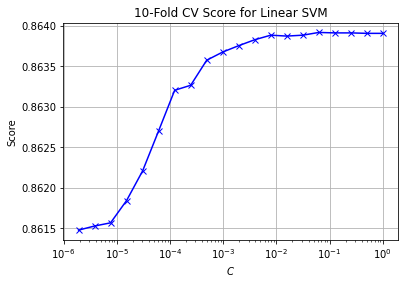

In [36]:
C = 1/(2**np.arange(0, 20)) # 1,...,1e-6

k = 10 # Kfold CV.
cv_scores = np.zeros(len(C))
split = model_selection.KFold(k)
for i in range(len(C)):
    svm = LinearSVC(C = C[i], dual = False)
    cv_scores[i] = np.mean(model_selection.cross_val_score(svm, X_train, y_train, cv = split))

plt.figure(2)
plt.semilogx(C, cv_scores, 'b-x')
plt.xlabel(r'$C$')
plt.ylabel(r'Score')
plt.title(r'{:d}-Fold CV Score for Linear SVM'.format(k))
plt.grid();

In [37]:
max_i = np.argmax(cv_scores)
C = C[max_i]
C

0.0625

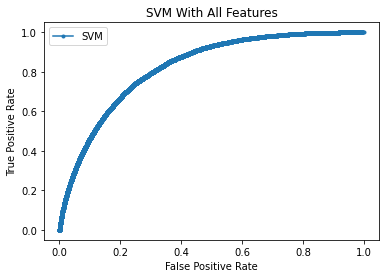

SVM Accuracy = 86.323%
SVM AUC = 0.82348


In [38]:
svm = LinearSVC(C = C, dual = False)
clf = CalibratedClassifierCV(svm)
clf.fit(X_train, y_train)   
y_pred = clf.predict(X_test)
svm_acc = metrics.accuracy_score(y_test, y_pred)
svm_probs = clf.predict_proba(X_test)
svm_probs = svm_probs[:, 1]
svm_auc = metrics.roc_auc_score(y_test, svm_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, svm_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
plt.title('SVM With All Features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('SVM Accuracy = {:0.3f}%'.format(100*svm_acc))
print('SVM AUC = %.5f' % (svm_auc))

In [39]:
for i in features:
    X_df = df.drop(['Diabetes', i], axis=1)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)
    svm = LinearSVC(C = C, dual = False)
    clf = CalibratedClassifierCV(svm)
    clf.fit(X_train, y_train)   
    y_pred = clf.predict(X_test)
    svm_acc = metrics.accuracy_score(y_test, y_pred)
    svm_probs = clf.predict_proba(X_test)
    svm_probs = svm_probs[:, 1]
    svm_auc = metrics.roc_auc_score(y_test, svm_probs)
    print('SVM AUC = %.5f' % (svm_auc), i)
    X_df = df

SVM AUC = 0.81622 HighBP
SVM AUC = 0.81831 HighChol
SVM AUC = 0.80800 BMI
SVM AUC = 0.82357 Smoker
SVM AUC = 0.82321 Stroke
SVM AUC = 0.82306 Myocardial
SVM AUC = 0.82352 PhysActivity
SVM AUC = 0.82345 Fruit
SVM AUC = 0.82347 Vegetables
SVM AUC = 0.82214 HeavyDrinker
SVM AUC = 0.82339 HasHealthcare
SVM AUC = 0.82347 NotAbleToAffordDoctor
SVM AUC = 0.80764 GeneralHealth
SVM AUC = 0.82342 MentalHealth
SVM AUC = 0.82336 PhysicalHealth
SVM AUC = 0.82352 HardToClimbStairs
SVM AUC = 0.82246 BiologicalSex
SVM AUC = 0.81531 AgeBracket
SVM AUC = 0.82273 IncomeBracket
SVM AUC = 0.82347 Kindergarten
SVM AUC = 0.82348 Elementary
SVM AUC = 0.82348 HighSchool
SVM AUC = 0.82348 GED
SVM AUC = 0.82348 College
SVM AUC = 0.82348 Graduate
SVM AUC = 0.82348 Aries
SVM AUC = 0.82348 Taurus
SVM AUC = 0.82348 Gemini
SVM AUC = 0.82348 Cancer
SVM AUC = 0.82348 Leo
SVM AUC = 0.82348 Virgo
SVM AUC = 0.82348 Libra
SVM AUC = 0.82348 Scorpio
SVM AUC = 0.82348 Sagittarius
SVM AUC = 0.82348 Capricorn
SVM AUC = 0.82347 

# Question 3

In [40]:
X_df = df.drop("Diabetes",axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)

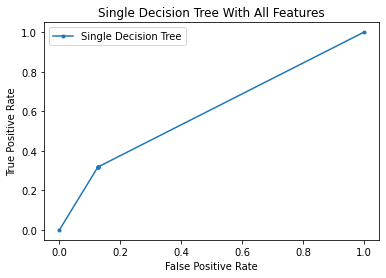

Single Decision Tree Accuracy = 79.491%
Single Decision Tree AUC = 0.59595


In [41]:
single_dt = tree.DecisionTreeClassifier(criterion="gini") 
single_dt.fit(X_train, y_train)
single_dt_pred = single_dt.predict(X_test)
single_dt_acc = metrics.accuracy_score(y_test, single_dt_pred)
single_dt_probs = single_dt.predict_proba(X_test)
single_dt_probs = single_dt_probs[:, 1]
single_dt_auc = metrics.roc_auc_score(y_test, single_dt_probs)
lrfpr, lrtpr, _ = metrics.roc_curve(y_test, single_dt_probs)
plt.plot(lrfpr, lrtpr, marker='.', label='Single Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Single Decision Tree With All Features')
plt.legend()
plt.show()
print('Single Decision Tree Accuracy = {:0.3f}%'.format(100*single_dt_acc))
print('Single Decision Tree AUC = %.5f' % (single_dt_auc))

In [42]:
for i in features:
    X_df = df.drop(['Diabetes', i], axis = 1)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)
    single_dt = tree.DecisionTreeClassifier(criterion="gini") 
    single_dt.fit(X_train, y_train)
    single_dt_probs = single_dt.predict_proba(X_test)
    single_dt_probs = single_dt_probs[:, 1]
    single_dt_auc = metrics.roc_auc_score(y_test, single_dt_probs)
    print('Single Decision Tree AUC = %.5f' % (single_dt_auc), i)
    X_df = df

Single Decision Tree AUC = 0.59857 HighBP
Single Decision Tree AUC = 0.59144 HighChol
Single Decision Tree AUC = 0.58176 BMI
Single Decision Tree AUC = 0.59986 Smoker
Single Decision Tree AUC = 0.59784 Stroke
Single Decision Tree AUC = 0.59506 Myocardial
Single Decision Tree AUC = 0.59732 PhysActivity
Single Decision Tree AUC = 0.59754 Fruit
Single Decision Tree AUC = 0.59742 Vegetables
Single Decision Tree AUC = 0.59910 HeavyDrinker
Single Decision Tree AUC = 0.59816 HasHealthcare
Single Decision Tree AUC = 0.59724 NotAbleToAffordDoctor
Single Decision Tree AUC = 0.59036 GeneralHealth
Single Decision Tree AUC = 0.59749 MentalHealth
Single Decision Tree AUC = 0.59722 PhysicalHealth
Single Decision Tree AUC = 0.59405 HardToClimbStairs
Single Decision Tree AUC = 0.59442 BiologicalSex
Single Decision Tree AUC = 0.59263 AgeBracket
Single Decision Tree AUC = 0.59394 IncomeBracket
Single Decision Tree AUC = 0.59591 Kindergarten
Single Decision Tree AUC = 0.59816 Elementary
Single Decision Tr

# Question 4

In [49]:
X_df = df.drop("Diabetes",axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)

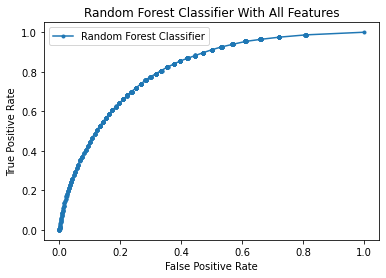

Random Forest Classifier Accuracy = 86.341%
Random Forest Classifier AUC = 0.81015


In [50]:
rfc = RandomForestClassifier(criterion='gini')
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = metrics.accuracy_score(y_test, rfc_pred)
rfc_probs = rfc.predict_proba(X_test)
rfc_probs = rfc_probs[:, 1]
rfc_auc = metrics.roc_auc_score(y_test, rfc_probs)
lrfpr, lrtpr, _ = metrics.roc_curve(y_test, rfc_probs)
plt.plot(lrfpr, lrtpr, marker='.', label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier With All Features')
plt.legend()
plt.show()
print('Random Forest Classifier Accuracy = {:0.3f}%'.format(100*rfc_acc))
print('Random Forest Classifier AUC = %.5f' % (rfc_auc))

In [51]:
for i in features:
    X_df = df.drop(['Diabetes', i], axis = 1)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)
    rfc = RandomForestClassifier(criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_probs = rfc.predict_proba(X_test)
    rfc_probs = rfc_probs[:, 1]
    rfc_auc = metrics.roc_auc_score(y_test, rfc_probs)
    print('Random Forest Classifier AUC = %.5f' % (rfc_auc), i)
    X_df = df

Random Forest Classifier AUC = 0.80023 HighBP
Random Forest Classifier AUC = 0.80192 HighChol
Random Forest Classifier AUC = 0.77869 BMI
Random Forest Classifier AUC = 0.80818 Smoker
Random Forest Classifier AUC = 0.80839 Stroke
Random Forest Classifier AUC = 0.80814 Myocardial
Random Forest Classifier AUC = 0.80860 PhysActivity
Random Forest Classifier AUC = 0.80761 Fruit
Random Forest Classifier AUC = 0.80835 Vegetables
Random Forest Classifier AUC = 0.80807 HeavyDrinker
Random Forest Classifier AUC = 0.80979 HasHealthcare
Random Forest Classifier AUC = 0.80978 NotAbleToAffordDoctor
Random Forest Classifier AUC = 0.78964 GeneralHealth
Random Forest Classifier AUC = 0.80802 MentalHealth
Random Forest Classifier AUC = 0.80688 PhysicalHealth
Random Forest Classifier AUC = 0.80905 HardToClimbStairs
Random Forest Classifier AUC = 0.80743 BiologicalSex
Random Forest Classifier AUC = 0.78941 AgeBracket
Random Forest Classifier AUC = 0.80365 IncomeBracket
Random Forest Classifier AUC = 0.809

# Question 5

In [52]:
X_df = df.drop("Diabetes",axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)

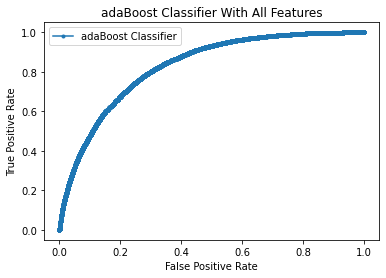

adaBoost Classifier Accuracy = 86.529%
adaBoost Classifier AUC = 0.82791


In [53]:
abc = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm = 'SAMME', learning_rate = 1, n_estimators = 100)
abc.fit(X_train, y_train)
abc_pred = abc.predict(X_test)
abc_acc = metrics.accuracy_score(y_test, abc_pred)
abc_probs = abc.predict_proba(X_test)
abc_probs = abc_probs[:, 1]
abc_auc = metrics.roc_auc_score(y_test, abc_probs)
lrfpr, lrtpr, _ = metrics.roc_curve(y_test, abc_probs)
plt.plot(lrfpr, lrtpr, marker='.', label='adaBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('adaBoost Classifier With All Features')
plt.legend()
plt.show()
print('adaBoost Classifier Accuracy = {:0.3f}%'.format(100*abc_acc))
print('adaBoost Classifier AUC = %.5f' % (abc_auc))

In [54]:
for i in features:
    X_df = df.drop(['Diabetes', i], axis = 1)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)
    abc = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm = 'SAMME', learning_rate = 1, n_estimators = 100)
    abc.fit(X_train, y_train)
    abc_probs = abc.predict_proba(X_test)
    abc_probs = abc_probs[:, 1]
    abc_auc = metrics.roc_auc_score(y_test, abc_probs)
    print('adaBoost Classifier AUC = %.5f' % (abc_auc), i)
    X_df = df

adaBoost Classifier AUC = 0.81991 HighBP
adaBoost Classifier AUC = 0.82355 HighChol
adaBoost Classifier AUC = 0.81118 BMI
adaBoost Classifier AUC = 0.82791 Smoker
adaBoost Classifier AUC = 0.82794 Stroke
adaBoost Classifier AUC = 0.82713 Myocardial
adaBoost Classifier AUC = 0.82791 PhysActivity
adaBoost Classifier AUC = 0.82791 Fruit
adaBoost Classifier AUC = 0.82791 Vegetables
adaBoost Classifier AUC = 0.82689 HeavyDrinker
adaBoost Classifier AUC = 0.82791 HasHealthcare
adaBoost Classifier AUC = 0.82791 NotAbleToAffordDoctor
adaBoost Classifier AUC = 0.81213 GeneralHealth
adaBoost Classifier AUC = 0.82803 MentalHealth
adaBoost Classifier AUC = 0.82791 PhysicalHealth
adaBoost Classifier AUC = 0.82805 HardToClimbStairs
adaBoost Classifier AUC = 0.82719 BiologicalSex
adaBoost Classifier AUC = 0.81819 AgeBracket
adaBoost Classifier AUC = 0.82698 IncomeBracket
adaBoost Classifier AUC = 0.82791 Kindergarten
adaBoost Classifier AUC = 0.82791 Elementary
adaBoost Classifier AUC = 0.82791 HighS

# Extra Credit

In [82]:
pd.set_option('display.max_columns', 500)
df.corr()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,HeavyDrinker,HasHealthcare,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,IncomeBracket,Kindergarten,Elementary,HighSchool,GED,College,Graduate,Aries,Taurus,Gemini,Cancer,Leo,Virgo,Libra,Scorpio,Sagittarius,Capricorn,Aquarius,Pisces
Diabetes,1.000000,0.263129,0.200276,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,-0.056584,-0.057056,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.163919,0.009894,0.056327,0.058547,0.061282,0.015623,-0.104927,0.000369,-0.001064,-0.001767,0.000872,0.001636,-0.002187,0.003984,-0.000751,-0.000153,0.001325,0.000419,-0.002693
HighBP,0.263129,1.000000,0.298199,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.171235,0.004062,0.041628,0.060347,0.088607,0.016035,-0.125819,0.003277,0.002799,-0.002338,-0.000571,-0.000080,-0.000616,0.000771,-0.001183,-0.000216,0.000419,-0.000546,-0.001703
HighChol,0.200276,0.298199,1.000000,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.085459,0.004022,0.028679,0.030164,0.043394,0.000655,-0.057553,-0.000703,0.002102,-0.003105,-0.000037,-0.001243,0.001094,0.001231,-0.000190,-0.000128,-0.001811,0.002632,0.000163
BMI,0.216843,0.213748,0.106722,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.100069,0.005479,0.020562,0.037541,0.057255,0.046257,-0.111752,0.000525,-0.000593,0.002612,0.002208,-0.001966,0.000744,-0.000772,-0.000084,-0.001040,0.000725,-0.001776,-0.000586
Smoker,0.060789,0.096991,0.091299,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.123937,-0.003368,0.010662,0.070951,0.101412,0.060137,-0.172716,-0.002684,0.001342,0.002101,0.003024,-0.002477,-0.001190,-0.003031,-0.000648,0.000267,0.001121,-0.000065,0.002227
Stroke,0.105816,0.129575,0.092620,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.128599,0.005297,0.029033,0.046932,0.034831,0.006560,-0.062008,0.002361,0.000271,0.000475,0.001591,-0.001551,-0.000913,-0.000879,0.000036,0.000300,-0.002162,0.002446,-0.001974
Myocardial,0.177282,0.209361,0.180765,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.141011,0.006501,0.042805,0.051615,0.048696,0.010073,-0.082647,0.003613,-0.002259,-0.001974,0.002744,0.000169,-0.001406,0.001594,-0.000374,-0.001573,0.000216,-0.000975,0.000208
PhysActivity,-0.118133,-0.125267,-0.078046,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.198539,-0.012854,-0.055573,-0.087737,-0.125302,-0.020701,0.176601,-0.000403,0.000407,0.001866,0.001473,-0.001192,0.002507,-0.004277,0.002214,-0.003664,-0.002134,0.003482,-0.000262
Fruit,-0.040779,-0.040555,-0.040859,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.079929,-0.000113,-0.015835,-0.045249,-0.077023,-0.018937,0.105784,-0.001033,0.000804,-0.000955,0.003206,-0.000042,0.000946,0.002028,0.003738,-0.001940,-0.004431,-0.001409,-0.000928
Vegetables,-0.056584,-0.061266,-0.039874,-0.062275,-0.030678,-0.041124,-0.039167,0.153150,0.254342,1.000000,0.021064,0.029584,-0.032232,-0.123066,-0.058884,-0.064290,-0.080506,-0.064765,-0.009771,0.151087,-0.005461,-0.039073,-0.068049,-0.108476,0.001074,0.130082,-0.000965,0.001233,-0.000167,0.001633,-0.002612,0.001049,0.002178,-0

In [92]:
df['PhysicalHealth'].corr(df['MentalHealth'])

0.353618867841803